## 신경망 학습

In [1]:
import numpy as np

### 데이터 학습
#### 신경망 학습
>학습이란 = 훈련 데이터로부터 가중치 매개변수의 최적값을 자동으로 획득하는 것

### 손실함수

##### 1. 평균 제곱 오차
$E=\frac{1}{2}\sum_{k}^{} {(y_k-t_k)^2}\\y_k= 신경망의 출력, t_k= 정답 레이블, k= 데이터의 차원수$

In [2]:
def mean_squared_error(y,t):
    return 0.5*np.sum((y-t)**2)

In [3]:
t=[0,0,1,0,0,0,0,0,0,0]                         #정답 레이블 '2'
y=[0.1,0.05,0.6,0.0,0.05,0.1,0.0,0.1,0.0,0.0]   #정답이 '2'라고 추정함 (0.6)
print(mean_squared_error(np.array(y),np.array(t)))
y=[0.1,0.05,0.1,0.0,0.05,0.1,0.0,0.6,0.0,0.0]
print(mean_squared_error(np.array(y),np.array(t))) #정답이 '7'이라고 추정함(0.6)

0.09750000000000003
0.5975


##### 2. 교차 엔트로피 오차
$E=-\sum_{k}^{} {t_klog_e y_k}\\y_k= 신경망의 출력, t_k= 정답 레이블, k= 데이터의 차원수$

In [4]:
def cross_entropy_error(y,t):
    delta=1e-7    #log0을 방지하기 위해서
    return -np.sum(t*np.log(y+delta))

In [5]:
t=[0,0,1,0,0,0,0,0,0,0]                         #정답 레이블 '2'
y=[0.1,0.05,0.6,0.0,0.05,0.1,0.0,0.1,0.0,0.0]
print(cross_entropy_error(np.array(y),np.array(t)))
y=y=[0.1,0.05,0.1,0.0,0.05,0.1,0.0,0.6,0.0,0.0]
print(cross_entropy_error(np.array(y),np.array(t)))

0.510825457099338
2.302584092994546


#### 손글씨 숫자 인식

In [6]:
import sys, os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist

(x_train, t_train),(x_test, t_test)=load_mnist(flatten=True, normalize=False)

print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [7]:
np.random.choice(60000,10)

array([31550, 46328,  2118, 59099, 29424, 39404, 47305, 27020, 42178,
       25877])

- 정답 레이블이 원-핫 인코딩인 경우

In [8]:
def cross_entropy_error(y,t):
    if y.ndim==1:
        t=t.reshape(1,t.size)
        y=y.reshape(1,y.size)
    batch_size=y.shape[0]
    return -np.sum(t*np.log(y))/batch_size

- 정답 레이블이 원-핫 인코딩이 아닌 경우

In [9]:
def cross_entropy_error(y,t):
    if y.ndim==1:
        t=t.reshape(1,t.size)
        y=y.reshape(1,y.size)
    batch_size=y.shape[0]
    return -np.sum(t*np.log(y[np.arange(batch_size),t]))/batch_size

#### 왜 손실함수를 설정하는가?
신경망을 학습할 때 정확도를 지표로 삼아서는 안 된다. 정확도를 지표로 하면 매개변수의 미분이 대부분의 장소에서 0이 되기 때문이다

### 수치 미분

미분의 정의를 이용한 식에는 2가지 문제점이 있다
1. h를 가급적 작은 값을 대입해도 반올림 오차 문제를 일으켜 0.0으로 컴퓨터가 계산하는데 문제가 생긴다
2. 함수 f으 차분 x+h와 x사이의 함수 f의 차분을 계산하지만, h를 무한히 0으로 좁히는 것이 불가능해 생기는 한계

개전점을 적용한 수치 미분

In [10]:
def numerical_diff(f,x):
    h=1e-4 #0.0001
    return (f(x+h)-f(x-h))/(2*h)

간단한 함수를 미분해보자
$$y=0.01x^2+0.1x$$

In [11]:
def function_1(x):
    return 0.01*x**2+0.1*x

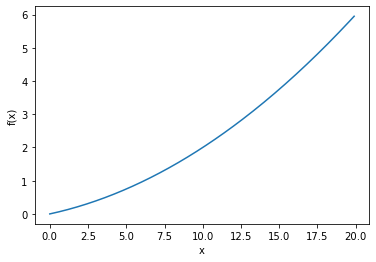

In [12]:
import matplotlib.pylab as plt

x=np.arange(0.0,20.0,0.1)
y=function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x,y)
plt.show()

In [13]:
print(numerical_diff(function_1,5))
print(numerical_diff(function_1,10))

0.1999999999990898
0.2999999999986347


### 편미분

$$f(x_0,x_1)=x_0^2+x_1^2$$

In [14]:
def function_2(x):
    return x[0]**2+x[1]**2

예시1. $x_0 =3, x_1=4$ 일때, $x_0$에 대한 편미분을 구하라

In [15]:
def function_tmp1(x0):
    return x0*x0+4.0**2
numerical_diff(function_tmp1,3.0)

6.00000000000378

예시2. $x_0 =3, x_1=4$ 일때, $x_1$에 대한 편미분을 구하라

In [16]:
def function_tmp2(x1):
    return 3.0**2+x1*x1
numerical_diff(function_tmp1,4.0)

7.999999999999119

### 기울기

$x_0$ 와 $x_1$의 편미분을 동시에 계산해서 벡터로 정리한 것을 기울기

In [17]:
def numerical_gradient(f,x):
    h= 1e-4
    grad=np.zeros_like(x)  #x와 같은 형상의 배열을 생성
    for idx in range(x.size):
        tmp_val=x[idx]
        #f(x+h) 계산
        x[idx]= tmp_val+h
        fxh1=f(x)
        #f(x-h) 계산
        x[idx]=tmp_val-h
        fxh2=f(x)
        
        grad[idx]=(fxh1-fxh2)/(2*h)
        x[idx]=tmp_val
    return grad

In [19]:
print(numerical_gradient(function_2,np.array([3.0,4.0]))) #(3,4)에서의 기울기
print(numerical_gradient(function_2,np.array([0,4.0])))   #(0,4)에서의 기울기
print(numerical_gradient(function_2,np.array([3.0,0])))   #(3,0)에서의 기울기

[6. 8.]
[0. 8.]
[6. 0.]
